### First plot of experiment data

We will first use pandas to take the first look

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# which folder are the datafiles in?
data_dir = 'C:/crs/proj/FA_science/'

# the files are zipped, so we have to unzip them first, then we can load them into a Pandas "dataframe"

# specify the filename
fname = '202769_20251109_1251-YELLOW_data.txt'

# use the Pandas read_csv function to load the dataframe
df = pd.read_csv( data_dir + fname )

# display a quick view of the data
df

,Time,Pressure,Sea pressure,Depth
0,2025-11-09 08:46:42.000,10.150256,0.017756,0.017611
1,2025-11-09 08:46:42.125,10.149523,0.017023,0.016884
2,2025-11-09 08:46:42.250,10.148639,0.016139,0.016008
3,2025-11-09 08:46:42.375,10.149541,0.017041,0.016901
4,2025-11-09 08:46:42.500,10.150180,0.017680,0.017536
...,...,...,...,...
117373,2025-11-09 12:51:13.625,10.120527,-0.011973,-0.011876
117374,2025-11-09 12:51:13.750,10.120796,-0.011704,-0.011609
117375,2025-11-09 12:51:13.875,10.118916,-0.013584,-0.013473
117376,2025-11-09 12:51:14.000,10.120026,-0.012474,-0.012373


In [3]:
# We are going to calculate depth from pressure ourselves, so delete the columns that RBR has calculated 
df =  df.drop(['Sea pressure', 'Depth'], axis=1)
# And show the remaining datad
df

,Time,Pressure
0,2025-11-09 08:46:42.000,10.150256
1,2025-11-09 08:46:42.125,10.149523
2,2025-11-09 08:46:42.250,10.148639
3,2025-11-09 08:46:42.375,10.149541
4,2025-11-09 08:46:42.500,10.150180
...,...,...
117373,2025-11-09 12:51:13.625,10.120527
117374,2025-11-09 12:51:13.750,10.120796
117375,2025-11-09 12:51:13.875,10.118916
117376,2025-11-09 12:51:14.000,10.120026


### Hydrostatic relationship: calculating depth from pressure measurements

In a **static** water column, pressure increases with depth due to the weight of overlying water.  
The formaula for the hydrostatic relationship is:

$$
P = P_{atm} + \rho g z
$$

where:

- $P$ — measured (absolute) pressure (Pa)  
- $P_{atm}$ — atmospheric pressure at the surface (Pa)  
- $\rho$ — water density (kg m$^{-3}$)  
- $g$ — gravitational acceleration (m s$^{-2}$)  
- $z$ — depth below the free surface, positive downward (m)

(The alternative is a **dynamic** situation, which is more complicated. The **static** approximation is very close.)

---

#### Solve for depth by removing the atmospheric pressure and dividing by density and gravitational acceleration

$$
z = \frac{P - P_{atm}}{\rho g}
$$

---

#### Note on units

Force is mass * accleration, with units of kg * m / s$^2$, which are also called Newtons ($N$)  
  
Pressure is force per unit area, with units of N/m$^2$ = kg / (m s$^2$), which are also called Pascals ($Pa$)

Pressure sensors often report **absolute pressure** in decibar (dbar), where  
$1\ \text{dbar} = 10^{4}\ \text{Pa}$.

Decibars are handy units because 1 decibar equals about 1 meter of water depth.
Atmospheric pressure is about 10 decibars.

---

#### Typical parameters

- $P_{atm} \approx 101325\ \text{Pa}$  
- $\rho \approx 1025\ \text{kg m}^{-3}$ (seawater) or $1000\ \text{kg m}^{-3}$ (freshwater)  
- $g \approx 9.80665\ \text{m s}^{-2}$

---

#### Notes
  
- The relationship assumes **hydrostatic equilibrium** (dynamic pressure fluctuations are small).  
- Adjust $\rho$ and $g$ for local salinity, temperature, and latitude if needed.


In [4]:
# So, to calculate depth for the entire column in the dataframe
# we want to use the formula
# depth = ( pressure - p_atmos )/(rhow*g)
# but our pressures are in decibars, so we need to multiply by 10,000 to get Pascals

# Our value of atmospheric pressure is ?
p_atmos = 10.1325 # decibars - replace with value from our notes
g = 9.80665 # gravitational acceleration (m s^-2)
rhow = 1025 # density of seawater (kg m^3) - replace with our measured value

df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g)
df

,Time,Pressure,Depth
0,2025-11-09 08:46:42.000,10.150256,0.017664
1,2025-11-09 08:46:42.125,10.149523,0.016935
2,2025-11-09 08:46:42.250,10.148639,0.016056
3,2025-11-09 08:46:42.375,10.149541,0.016953
4,2025-11-09 08:46:42.500,10.150180,0.017589
...,...,...,...
117373,2025-11-09 12:51:13.625,10.120527,-0.011911
117374,2025-11-09 12:51:13.750,10.120796,-0.011644
117375,2025-11-09 12:51:13.875,10.118916,-0.013513
117376,2025-11-09 12:51:14.000,10.120026,-0.012410


In [5]:
df.describe()

,Pressure,Depth
count,117378.000000,117378.000000
mean,10.385577,0.251772
std,0.311988,0.310379
min,10.091396,-0.040893
25%,10.137333,0.004808
50%,10.149535,0.016947
75%,10.761100,0.625360
max,10.935592,0.798952


Text(0, 0.5, 'Depth (m)')

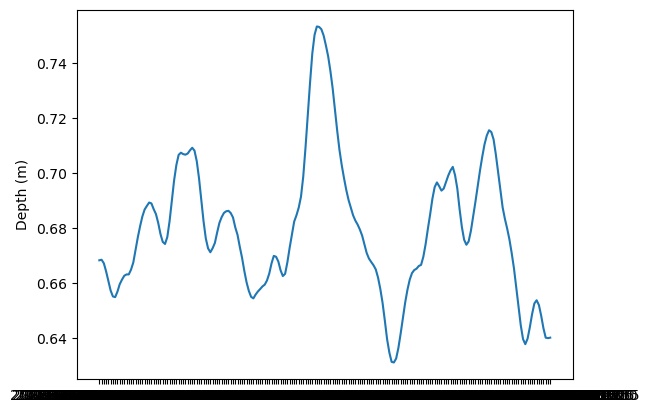

In [6]:
# make a quick plot of that data (we have to pick a subset, or it takes forever to plot)
plt.plot( df['Time'][55000:55200], df['Depth'][55000:55200] )
plt.ylabel( 'Depth (m)' )